# **Digital Signal and Image Management - E01**<br/>
**Master's Degree in Data Science (A.Y. 2024/2025)**<br/>
**University of Milano - Bicocca**<br/>



In [ ]:
import os
import numpy as np
from time import time
from scipy.io import wavfile as wav

import matplotlib.pyplot as plt
import IPython.display as ipd

# Classification tools
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# File management
from google.colab import drive
import tarfile
from shutil import copyfile

## Data import

In [ ]:
# Link Google Drive account, transfer dataset, and extract files
drive.mount('/content/gdrive')
copyfile('/content/gdrive/MyDrive/Digital Signal and Image Management/recordings.tar', 'recordings.tar')
tar = tarfile.open('recordings.tar')
tar.extractall()
tar.close()

Mounted at /content/gdrive


In [ ]:
# Import file
sound_rate, sound_data = wav.read('recordings/0_jackson_0.wav') # Extracts the data from the audio file,
# transforming it into a numerical array (sound_data) and also returning the sampling frequency (sound_rate)
# Play the signal
ipd.Audio(sound_data, rate=sound_rate) # To play audio directly inside a notebook

## Data loader

In [ ]:
# Placecholder for feature extractor
def identity(input):
    return input

# Data loader
# function that loads the audio files, extracts the features and divides the data into training and test sets.
def load_data(feature_extractor=identity, normalize=False):

    labels = []
    features = []

    for f in sorted(os.listdir('./recordings')):
        if f.endswith('.wav'):
            # Load file and compute the requested features
            _, signal = wav.read('./recordings/' + f)
            cur_features = feature_extractor(signal)
            features.append(cur_features)

            # Classes
            label = f.split('_')[0]
            labels.append(label)

    # X: features, y: labels
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=1) # 90% training, 10% test

    if normalize:
        eps = 0.001
        X_train = np.array(X_train)
        X_train_mean = X_train.mean(axis=0)
        X_train_std = X_train.std(axis=0)
        X_train = (X_train - X_train_mean + eps)/(X_train_std + eps)
        X_train = [row for row in X_train]

        X_test = [row for row in (np.array(X_test) - X_train_mean + eps)/(X_train_std + eps)]

    return X_train, X_test, y_train, y_test

## Features

In [ ]:
# Create sample data and corresponding feature
dummy_data = np.random.rand(100) # Generates arrays of 100 random values between 0 and 1
feats_scalar = np.std(dummy_data) # Std without array
feats_vector = np.std(dummy_data, keepdims=True) # Std with array

In [ ]:
# Scalar feature
print(feats_scalar)
print(feats_scalar.shape)

0.2772600832062646
()


In [ ]:
# Vector feature
print(feats_vector)
print(feats_vector.shape)

[0.27726008]
(1,)


### Energy

$
E(x) = \sum_i x_i^2
$

In [ ]:
# Function that calculates the energy of a signal
def energy(input):
    return np.sum((input*1.0)**2, keepdims=True)

In [ ]:
# Data loading and extracting energy characteristics
X_train, X_test, y_train, y_test = load_data(feature_extractor=energy)
print('Numer of training examples: {}'.format(len(X_train)))
print('Dimensionality of the training features: {}'.format(X_train[0].shape))

Numer of training examples: 1350
Dimensionality of the training features: (1,)


In [ ]:
# Support Vector Machine (SVM) initialization
clf = SVC(kernel='rbf', class_weight='balanced')

In [ ]:
# SVM training
# Trained the SVM classifier on the training set using signal energy as characteristics
clf = clf.fit(X_train, y_train)

In [ ]:
# SVM inference
# After training the model, use the test set to make predictions.
y_pred = clf.predict(X_test)

In [ ]:
# Classification report
print('Classification report:')
print(classification_report(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        17
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        15
           3       0.17      0.58      0.26        19
           4       0.12      0.27      0.17        11
           5       0.10      0.14      0.12        14
           6       0.40      0.29      0.33        14
           7       0.14      0.16      0.15        19
           8       0.00      0.00      0.00        17
           9       0.00      0.00      0.00        14

    accuracy                           0.16       150
   macro avg       0.14      0.15      0.11       150
weighted avg       0.15      0.16      0.12       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The metrics are quite low, indicating not too good predictions, an accuracy of 0.16 indicating that only 16% of the test set was correctly classified.

In [ ]:
# Confusion matrix
# For evaluate the performance of a classifier
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix:
[[ 1  0  1  9  0  2  2  2  0  0]
 [ 0  0  0  6  4  0  0  0  0  0]
 [ 0  0  0  6  1  5  0  3  0  0]
 [ 0  0  1 11  4  2  0  1  0  0]
 [ 1  0  2  1  3  0  2  2  0  0]
 [ 0  0  1  5  3  2  1  2  0  0]
 [ 0  0  0  8  0  0  4  2  0  0]
 [ 0  0  0  9  2  5  0  3  0  0]
 [ 0  0  0  7  3  4  1  2  0  0]
 [ 0  0  1  3  5  0  0  5  0  0]]


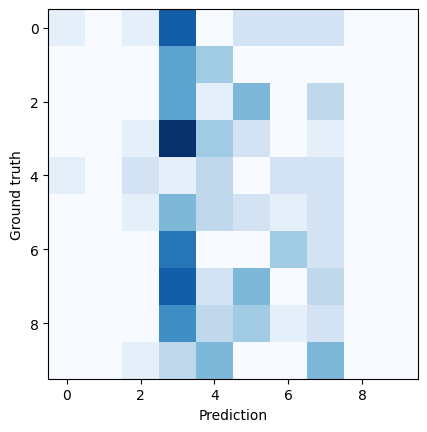

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

### Duration

In [ ]:
# The same procedure as before but classifying signals according to their duration and not the energy of the signal
def duration(input):
    return np.array(input.shape)

In [ ]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=duration)

In [ ]:
# SVM initialization and training
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [ ]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      0.41      0.36        17
           1       0.22      0.40      0.29        10
           2       0.00      0.00      0.00        15
           3       0.38      0.26      0.31        19
           4       0.38      0.27      0.32        11
           5       0.00      0.00      0.00        14
           6       0.67      0.14      0.24        14
           7       0.33      0.05      0.09        19
           8       0.26      0.71      0.38        17
           9       0.06      0.14      0.08        14

    accuracy                           0.24       150
   macro avg       0.26      0.24      0.21       150
weighted avg       0.27      0.24      0.21       150



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


By classifying the signals by duration instead of energy the accuracy increased from 0.16 to 0.24, 24% of the test set was predicted correctly, it is easier for the model to classify signals by their accuracy rather than duration although the results are still low.

Confusion matrix:


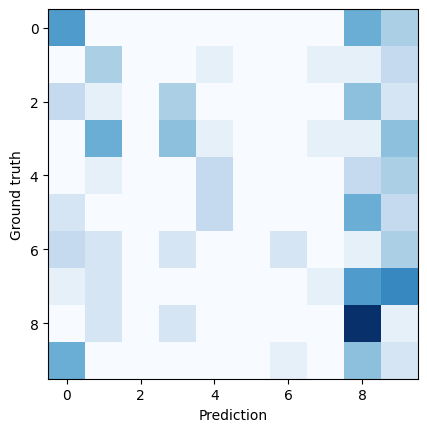

In [ ]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

## Features combo with normalization

In [ ]:
# The combo() function allows you to combine several characteristics extracted from an audio signal
# (energy and duration in this case),
def combo(input):
    return np.concatenate((energy(input),duration(input)))

In [ ]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=combo, normalize=True)
print('Numer of training examples: {}'.format(len(X_train)))
print('Dimensionality of the training features: {}'.format(X_train[0].shape))

Numer of training examples: 1350
Dimensionality of the training features: (2,)


In [ ]:
# SVM initialization and training
clf = SVC(kernel='rbf', class_weight='balanced')
clf = clf.fit(X_train, y_train)

In [ ]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.24      0.35        17
           1       0.11      0.10      0.11        10
           2       0.00      0.00      0.00        15
           3       0.39      0.63      0.48        19
           4       0.46      0.55      0.50        11
           5       0.17      0.14      0.15        14
           6       0.50      0.14      0.22        14
           7       0.38      0.16      0.22        19
           8       0.09      0.12      0.10        17
           9       0.26      0.71      0.38        14

    accuracy                           0.28       150
   macro avg       0.30      0.28      0.25       150
weighted avg       0.31      0.28      0.25       150



Further improvement in accuracy, classifying the signal according to the two characteristics is the best solution.

Confusion matrix:


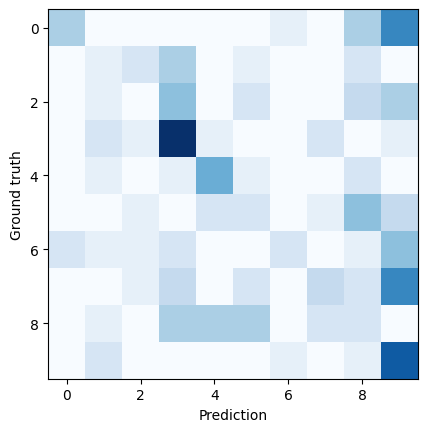

In [ ]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

## Hyperparameter optimization

In [ ]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=combo, normalize=True)

In [ ]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
# GridSearchCV will explore all parameter combinations and select the best combination of beta and gamma.

clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 5.209s


In [ ]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
# Best parameters combination
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 1000
 gamma: 0.1


In [ ]:
# SVM test
# Classifier trained on the best combination
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.47      0.48        17
           1       0.15      0.20      0.17        10
           2       0.00      0.00      0.00        15
           3       0.38      0.53      0.44        19
           4       0.45      0.45      0.45        11
           5       0.19      0.21      0.20        14
           6       0.47      0.50      0.48        14
           7       0.36      0.21      0.27        19
           8       0.14      0.12      0.13        17
           9       0.36      0.57      0.44        14

    accuracy                           0.33       150
   macro avg       0.30      0.33      0.31       150
weighted avg       0.31      0.33      0.31       150



Further increase in accuracy through hyperparameter optimization.

Confusion matrix:


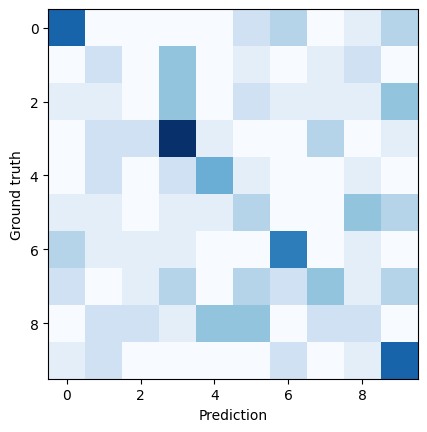

In [ ]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

## Assignment: Zero-Crossing Rate

In [ ]:
# The Zero Crossing Rate (ZCR) is a measure that indicates how many times an audio signal crosses the zero line
# (i.e. changes sign) during a period of time.
def zcr(input):
    input = np.array(input)
    shifted_input = np.roll(input, 1) #shifted version of the input array where each value is moved one position to the right
    original_sign = np.sign(input) # #sign of the original input
    shifted_sign = np.sign(shifted_input) #sign of the shifted input
    sing_change = original_sign != shifted_sign #compares the sign of each element with its shifted counterpart to detect sign changes
    output = np.sum(sing_change, keepdims=True) #counts the total number of sign changes.
    return output

**Zero-Crossing Rate**:
count how many times the signal goes from positive to negative, and from negative to positive.

Possible approach:

1. Shift the signal by one unit
2. Compare point-by-point the sign (``np.sign()``) of the original signal and of the shifted signal
3. Accumulate the instances of sign change

In [ ]:
# function that concatenates together three characteristics extracted from an audio signal:
# energy (energy), duration (duration), and Zero Crossing Rate (ZCR).
def combo2(input):
    return np.concatenate((energy(input),duration(input),zcr(input)))

In [ ]:
# Data loading
X_train, X_test, y_train, y_test = load_data(feature_extractor=combo2, normalize=True)

In [ ]:
# Parameters to be tested in cross-validation
param_grid = {'C': [100, 500, 1000],
          'gamma': [0.005, 0.01, 0.1, 0.5, 1.0], }

# Support Vector Machine initialization
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid, cv=2)

# Training
t0 = time()
clf = clf.fit(X_train, y_train)
print('Training completed in %0.3fs' % (time() - t0))

Training completed in 2.811s


In [ ]:
# Result of the cross validation for parameters selection
print('Best parameters combination:')
print(' C: '+str(clf.best_estimator_.C))
print(' gamma: '+str(clf.best_estimator_.gamma))

Best parameters combination:
 C: 100
 gamma: 0.5


In [ ]:
# SVM test
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.44      0.70      0.54        10
           2       0.44      0.53      0.48        15
           3       0.64      0.37      0.47        19
           4       0.37      0.64      0.47        11
           5       0.23      0.21      0.22        14
           6       0.81      0.93      0.87        14
           7       0.36      0.21      0.27        19
           8       0.60      0.53      0.56        17
           9       0.62      0.71      0.67        14

    accuracy                           0.52       150
   macro avg       0.52      0.54      0.52       150
weighted avg       0.53      0.52      0.51       150



The accuracy is 52%, the model correctly classifies about half of the examples. Accuracy was increased a lot by including the zero crossing rate as a classification factor.

Class 6 is the best performing (all metrics are high), while 5 has the worst performance: the model struggles to predict this class correctly. High performance classes are class 0 and 9.

Confusion matrix:


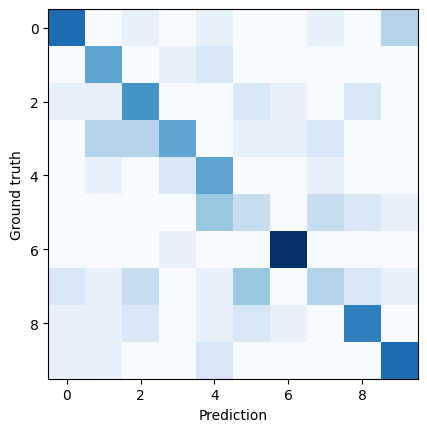

In [ ]:
# Confusion matrix
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues);
plt.xlabel('Prediction');
plt.ylabel('Ground truth');

The dark cells along the main diagonal indicate that most of the predictions are correct, the model manages to classify many examples correctly; the classes corresponding to ‘Ground truth = 6’ and ‘Prediction = 6’ show a strong intensity, suggesting a very good prediction for this class. Other classes, such as ‘Ground truth = 5’ and ‘Prediction = 5’, appear to have good accuracy, but may also show some errors.
**The model seems to make good predictions, as the diagonal is well shown.**